In [23]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [25]:
income_data=pd.read_csv('income.csv', delimiter= ", ", header=0)
income_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [26]:
income_data["sex"] = income_data["sex"].apply(lambda row: 0 if row == "Male" else 1)
income_data["country-int"] = income_data["native-country"].apply(lambda row: 0 if row == "United-States" else 1)
income_data["income"] = income_data["income"].apply(lambda row: 0 if row == "<=50K" else 1)
income_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,country-int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,1,0,0,40,United-States,0,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,1,0,0,16,Jamaica,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,45,United-States,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,1,14084,0,50,United-States,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,5178,0,40,United-States,1,0


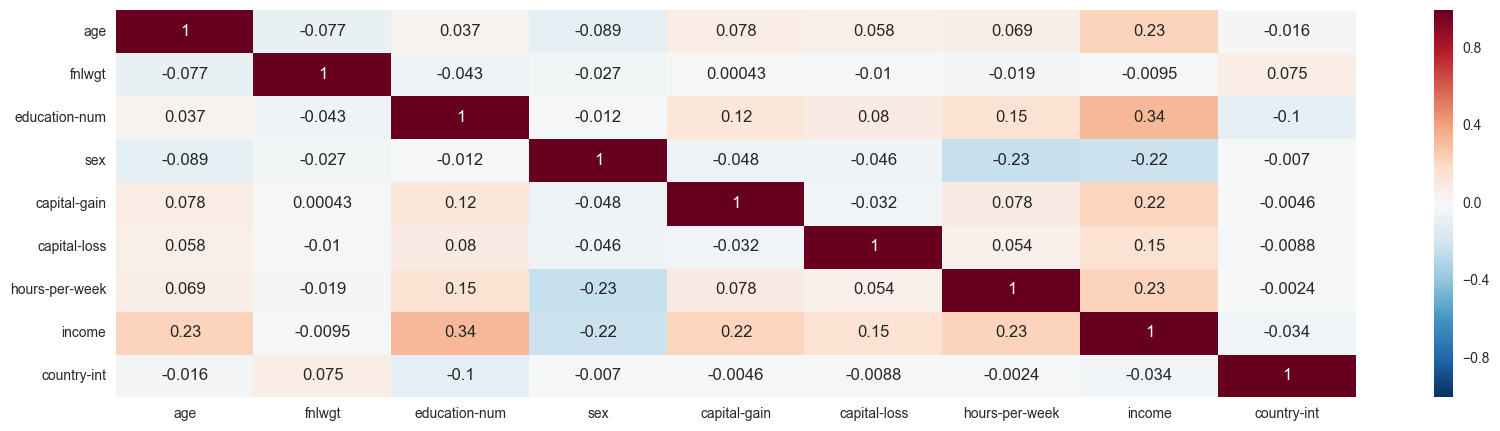

In [27]:
plt.figure(figsize=(20,5))
correlation_matrix=income_data.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [28]:
features =income_data[["age", "education-num","sex", "capital-gain", "capital-loss", "hours-per-week"]]
target=income_data[['income']]

In [30]:
train_data, test_data, train_labels, test_labels = train_test_split(features, target, random_state=1)

### Using Radom Forrest Classifier

In [31]:
forest= RandomForestClassifier(random_state=1)
forest.fit(train_data,train_labels)
s=forest.score(test_data,test_labels)
print('Random Forrest Score is {}'.format(s))

Random Forrest Score is 0.8315931703721902
